In [1]:
#here we import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datapackage
import re

## Population from 1981 to 2018

In [2]:
#here we import the csv file about population 
Pop_df = pd.read_excel("Good_data_sources_and_tables/HistoricalPopulationValues.xls")
Pop_df.head()

,Country,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,24900000,25201900,25456300,25701800,25941600,26203800,26549700,26894800,27379300,...,33487208,33759742,34030589,34300083,34568211,34834841,35099836,35362905,35623680,35881659
1,United States,229465714,231664458,233791994,235824902,237923795,240132887,242288918,244498982,246819230,...,307240000,309794000,312098000,314374000,316598000,318953000,321323000,323128000,325511000,327892000
2,Cuba,9705971,9791907,9886945,9983215,10084188,10182674,10278541,10381668,10488855,...,11260468,11261880,11263757,11261601,11250491,11237982,11214038,11179995,11147407,11116396
3,Mexico,69930971,71567658,73257049,74943413,76600787,78248289,79903511,81540513,83105466,...,112426381,114061440,115701117,117299155,118818228,120286655,121736809,123166749,124574795,125959205
4,Antigua Barbuda,68264,68008,65620,64470,64398,64402,64418,64427,64385,...,85632,86754,87884,89018,90156,91295,92436,93581,94731,95882


## GDP in billions($)

In [3]:
#here we import the csv file about GDP in bilions
Gdp_df = pd.read_excel('Good_data_sources_and_tables/GDP_billions.xls')
Gdp_df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,781.317688,808.688171,782.793823,803.135254,850.723816,890.997803,910.259583,947.547974,989.518677,...,1565.208008,1613.471436,1664.154175,1693.201538,1735.108276,1784.658325,1802.520752,1828.010254,1883.716064,1919.103394
1,United States,6529.173340,6698.570801,6570.568359,6874.947266,7374.005859,7686.570801,7956.493652,8231.926758,8577.995117,...,14594.841797,14992.051758,15224.553711,15567.037109,15853.793945,16242.525391,16710.457031,16972.345703,17348.623047,17844.271484
2,Cuba,29.980064,35.882641,39.082737,41.197689,44.464546,45.174500,45.217556,44.131351,45.766655,...,62.826229,64.328003,66.130661,68.124435,69.996223,70.729492,73.868568,74.248077,75.572289,76.403587
3,Mexico,543.234863,589.548950,586.478516,566.031372,585.337646,598.143005,579.726440,589.711853,597.279419,...,1006.297180,1057.800659,1096.547974,1136.487915,1151.876953,1184.179443,1223.115234,1258.559326,1284.252441,1309.863159
4,Antigua Barbuda,0.393900,0.408927,0.408584,0.430500,0.474261,0.510512,0.569190,0.606906,0.638546,...,1.241885,1.152469,1.128508,1.168080,1.166867,1.221221,1.270384,1.341395,1.382074,1.450220


In [4]:
#here we drop 1980 to match all the datasets
Gdp_df = Gdp_df.drop([1980], axis=1)

## GDP per capita

In [5]:
#here we are using the function melt to adapt the gdp table so we can work with it
columns = list(Gdp_df.columns)
columns.remove('Country')
gdp_melted = pd.melt(Gdp_df, id_vars=['Country'], value_vars=columns, var_name="Year", value_name="GDP")

gdp_melted.head()

,Country,Year,GDP
0,Canada,1981,808.688171
1,United States,1981,6698.570801
2,Cuba,1981,35.882641
3,Mexico,1981,589.548950
4,Antigua Barbuda,1981,0.408927


In [6]:
#here we are using the function melt to adapt the population table so we can work with it
columns = list(Pop_df.columns)
columns.remove('Country')
pop_melted = pd.melt(Pop_df, id_vars=['Country'], value_vars=columns, var_name="Year", value_name="Population")

pop_melted.head()

,Country,Year,Population
0,Canada,1981,24900000.0
1,United States,1981,229465714.0
2,Cuba,1981,9705971.0
3,Mexico,1981,69930971.0
4,Antigua Barbuda,1981,68264.0


In [7]:
#here we merge both datasets to be able to compare each parameter
gdp_p_df = pd.merge(gdp_melted, pop_melted, on=['Country','Year'])
gdp_p_df.head()

,Country,Year,GDP,Population
0,Canada,1981,808.688171,24900000.0
1,United States,1981,6698.570801,229465714.0
2,Cuba,1981,35.882641,9705971.0
3,Mexico,1981,589.548950,69930971.0
4,Antigua Barbuda,1981,0.408927,68264.0


In [8]:
#here we create a new column with the values showing the GDP per capita
gdp_p_df['GDP_per_capita'] = ((gdp_p_df['GDP'] * 1000000000) / gdp_p_df['Population'])

In [9]:
gdp_p_df.head()

,Country,Year,GDP,Population,GDP_per_capita
0,Canada,1981,808.688171,24900000.0,32477.436602
1,United States,1981,6698.570801,229465714.0,29192.033459
2,Cuba,1981,35.882641,9705971.0,3696.965594
3,Mexico,1981,589.548950,69930971.0,8430.441359
4,Antigua Barbuda,1981,0.408927,68264.0,5990.381182


In [10]:
#this was just a test to see the GDP in a similar magnitude than the population
#gdp_p_df['GDP_in_$'] = gdp_p_df['GDP'] * 1000000000

In [11]:
#here we save the table to work with it in tableau
gdp_p_df.to_csv('GDP_P.csv')

## Fertility  and Child Mortality

### Fertility

In [12]:
#here we import the csv file about children per woman or the fertility rate
Fertility_df = pd.read_csv('Good_data_sources_and_tables/children_per_woman_UN.csv', skiprows=1)

In [13]:
Fertility_df.head()

,Afghanistan,AFG,1950,7.45
0,Afghanistan,AFG,1951,7.45
1,Afghanistan,AFG,1952,7.45
2,Afghanistan,AFG,1953,7.45
3,Afghanistan,AFG,1954,7.45
4,Afghanistan,AFG,1955,7.45


In [14]:
#here we are preparing the dataset to match the GDP and Population one
new_row = pd.DataFrame({'Afghanistan':'Afghanistan', 'AFG':'AFG', '1950':1950, '7.45':7.45,},index =[0])  
Fertility_df = pd.concat([new_row, Fertility_df]).reset_index(drop = True) 
Fertility_df.head(5) 

,Afghanistan,AFG,1950,7.45
0,Afghanistan,AFG,1950,7.45
1,Afghanistan,AFG,1951,7.45
2,Afghanistan,AFG,1952,7.45
3,Afghanistan,AFG,1953,7.45
4,Afghanistan,AFG,1954,7.45


In [15]:
Fertility_df.rename(columns={'Afghanistan':'Country','AFG':'Code','1950':'Year','7.45':'Fertility_rate'}, inplace=True)
Fertility_df.head()

,Country,Code,Year,Fertility_rate
0,Afghanistan,AFG,1950,7.45
1,Afghanistan,AFG,1951,7.45
2,Afghanistan,AFG,1952,7.45
3,Afghanistan,AFG,1953,7.45
4,Afghanistan,AFG,1954,7.45


### Mortality

In [16]:
#here we import the csv file about child mortality rates
Mortality_df = pd.read_csv('Good_data_sources_and_tables/child_mortality_igme.csv')
Mortality_df.head()

,Entity,Code,Year,Child mortality (%)
0,Afghanistan,AFG,1960,35.65
1,Afghanistan,AFG,1961,35.05
2,Afghanistan,AFG,1962,34.48
3,Afghanistan,AFG,1963,33.93
4,Afghanistan,AFG,1964,33.41


In [17]:
#here we are preparing the dataset to match the GDP and Population one
Mortality_df.rename(columns={'Child mortality (%)':'Child_Mortality_rate','Entity':'Country'}, inplace=True)
Mortality_df.head()

,Country,Code,Year,Child_Mortality_rate
0,Afghanistan,AFG,1960,35.65
1,Afghanistan,AFG,1961,35.05
2,Afghanistan,AFG,1962,34.48
3,Afghanistan,AFG,1963,33.93
4,Afghanistan,AFG,1964,33.41


## Terciary Education (% of people 15+)

In [18]:
#here we import the csv file about children per woman or the fertility rate
education_df = pd.read_csv('Good_data_sources_and_tables/tertiary_education.csv')
education_df.head()

,Entity,Code,Year,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary (%)
0,Afghanistan,AFG,1970,1.08
1,Afghanistan,AFG,1975,1.48
2,Afghanistan,AFG,1980,1.96
3,Afghanistan,AFG,1985,2.49
4,Afghanistan,AFG,1990,2.91


In [19]:
#here we are preparing the dataset to match the GDP and Population one
education_df.rename(columns={'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary (%)':'Tertiary_education','Entity':'Country'}, inplace=True)
education_df.head()

,Country,Code,Year,Tertiary_education
0,Afghanistan,AFG,1970,1.08
1,Afghanistan,AFG,1975,1.48
2,Afghanistan,AFG,1980,1.96
3,Afghanistan,AFG,1985,2.49
4,Afghanistan,AFG,1990,2.91


In [20]:
education_df = education_df.drop(['Code'], axis=1)
education_df.head()

,Country,Year,Tertiary_education
0,Afghanistan,1970,1.08
1,Afghanistan,1975,1.48
2,Afghanistan,1980,1.96
3,Afghanistan,1985,2.49
4,Afghanistan,1990,2.91


### Merging Child Mortality and Fertility

In [21]:
#here we merge both datasets to be able to compare each parameter
F_M_df = pd.merge(Fertility_df, Mortality_df, on=['Country','Year','Code'])
F_M_df.head()

,Country,Code,Year,Fertility_rate,Child_Mortality_rate
0,Afghanistan,AFG,1960,7.45,35.65
1,Afghanistan,AFG,1961,7.45,35.05
2,Afghanistan,AFG,1962,7.45,34.48
3,Afghanistan,AFG,1963,7.45,33.93
4,Afghanistan,AFG,1964,7.45,33.41


In [22]:
#here we drop Code because we don't need it
F_M_df = F_M_df.drop(['Code'], axis=1)

In [23]:
F_M_df.head()

,Country,Year,Fertility_rate,Child_Mortality_rate
0,Afghanistan,1960,7.45,35.65
1,Afghanistan,1961,7.45,35.05
2,Afghanistan,1962,7.45,34.48
3,Afghanistan,1963,7.45,33.93
4,Afghanistan,1964,7.45,33.41


In [24]:
#here we save the table to work with it in tableau
F_M_df.to_csv('F_M.csv')

## Merging the two merged df

In [25]:
#here we merge both merged datasets to be able to compare each parameter
final_df = pd.merge(F_M_df,gdp_p_df ,on=['Country','Year'])
final_df.head()

,Country,Year,Fertility_rate,Child_Mortality_rate,GDP,Population,GDP_per_capita
0,Afghanistan,1981,7.449,23.46,8.482517,13676225.0,620.238205
1,Afghanistan,1982,7.450,22.81,8.038422,12582762.0,638.843970
2,Afghanistan,1983,7.452,22.14,8.542439,12439282.0,686.730834
3,Afghanistan,1984,7.455,21.47,9.674223,12768664.0,757.653498
4,Afghanistan,1985,7.458,20.80,7.698607,13119943.0,586.786653


In [26]:
#here we use the pct_change function to create two extra columns showing the Population and GDP growth respectively
final_df['GDP_growth'] = final_df.groupby('Country')['GDP'].pct_change() * 100
final_df['Population_growth'] = final_df.groupby('Country')['Population'].pct_change() *100
final_df = final_df.round({'GDP_growth':2, 'Population_growth':2, 'Fertility_rate':2})
final_df.head()

,Country,Year,Fertility_rate,Child_Mortality_rate,GDP,Population,GDP_per_capita,GDP_growth,Population_growth
0,Afghanistan,1981,7.45,23.46,8.482517,13676225.0,620.238205,NaN,NaN
1,Afghanistan,1982,7.45,22.81,8.038422,12582762.0,638.843970,-5.24,-8.00
2,Afghanistan,1983,7.45,22.14,8.542439,12439282.0,686.730834,6.27,-1.14
3,Afghanistan,1984,7.46,21.47,9.674223,12768664.0,757.653498,13.25,2.65
4,Afghanistan,1985,7.46,20.80,7.698607,13119943.0,586.786653,-20.42,2.75


In [27]:
#here we are checking the NaN values in our dataset, but it's okey because we only have the first year of each country for the
#growth rate columns and it makes sense since we can't calculate the growth if we don't know the previous value
final_df.isna().sum()

Country                   0
Year                      0
Fertility_rate            0
Child_Mortality_rate      0
GDP                       0
Population                0
GDP_per_capita            0
GDP_growth              157
Population_growth       157
dtype: int64

### Merging the education table to the main for later analysis

In [28]:
#here we merge the final dataset with the Tertiary Education dataset to be able to compare education to the other parameters each parameter
ed_merge = pd.merge(final_df, education_df, on=['Country','Year'])

In [29]:
#this df goes from 1985 to 2010 by 5 year periods
ed_merge.head()

,Country,Year,Fertility_rate,Child_Mortality_rate,GDP,Population,GDP_per_capita,GDP_growth,Population_growth,Tertiary_education
0,Afghanistan,1985,7.46,20.80,7.698607,13119943.0,586.786653,-20.42,2.75,2.49
1,Afghanistan,1990,7.47,17.51,4.592665,13568282.0,338.485353,-2.60,0.49,2.91
2,Afghanistan,1995,7.61,14.78,5.546277,19445013.0,285.228741,26.20,5.19,3.28
3,Afghanistan,2000,7.49,12.88,6.121582,22461349.0,272.538485,-1.80,1.15,3.50
4,Afghanistan,2005,6.83,11.01,9.036353,26334702.0,343.134815,11.23,2.48,3.61


In [30]:
ed_merge.isna().sum()

Country                 0
Year                    0
Fertility_rate          0
Child_Mortality_rate    0
GDP                     0
Population              0
GDP_per_capita          0
GDP_growth              0
Population_growth       0
Tertiary_education      0
dtype: int64

In [31]:
#here we save the table to work with it in tableau
ed_merge.to_csv('Ed_table.csv')

## Analysis

In [32]:
#here we check the correlation matrix for the final dataframe
final_df.corr()

,Fertility_rate,Child_Mortality_rate,GDP,Population,GDP_per_capita,GDP_growth,Population_growth
Fertility_rate,1.000000,0.860562,-0.211513,-0.091092,-0.465418,0.048722,0.501835
Child_Mortality_rate,0.860562,1.000000,-0.176880,-0.011777,-0.466947,0.040085,0.349122
GDP,-0.211513,-0.176880,1.000000,0.372812,0.304130,-0.015861,-0.107001
Population,-0.091092,-0.011777,0.372812,1.000000,-0.048362,0.056945,-0.035767
GDP_per_capita,-0.465418,-0.466947,0.304130,-0.048362,1.000000,-0.045313,-0.134740
GDP_growth,0.048722,0.040085,-0.015861,0.056945,-0.045313,1.000000,0.179968
Population_growth,0.501835,0.349122,-0.107001,-0.035767,-0.134740,0.179968,1.000000


In [33]:
#here we droped the column GDP_in_$ because it had colinearity with GDP, but now I'm not longer using it
#final_df = final_df.drop(['GDP_in_$'], axis=1)
#final_df.head()

In [34]:
#here we save the table to work with it in tableau
final_df.to_csv('Final_df.csv')

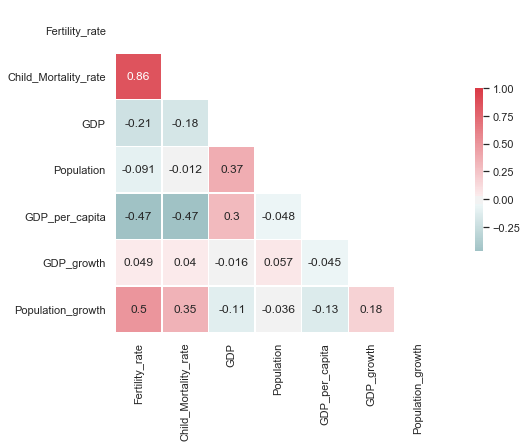

In [35]:
# here we are using seaborn to show the heatmap of the correlation between our final datasets' parameters
corr = final_df.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()



In [36]:
#here we save the table to work with it in tableau
corr.to_csv('correlation_matrix.csv')

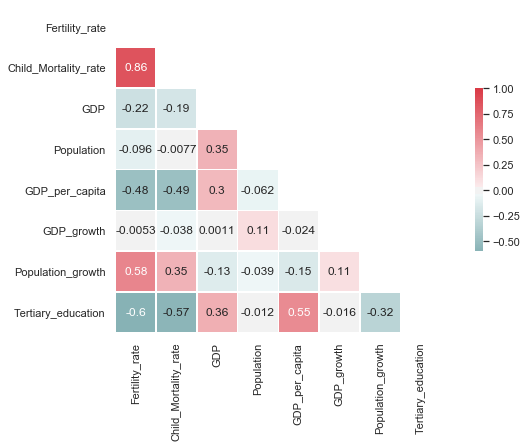

In [37]:
# here we are using seaborn to show the heatmap of the correlation between our Education datasets' parameters
corr2 = ed_merge.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


In [38]:
#here we group by year to plot some chart about the whole world and see some implications
final_years = final_df[['Year','GDP','Population', 'GDP_per_capita','Fertility_rate','Child_Mortality_rate']].groupby(['Year']).agg({'Population':'mean','GDP':'mean','GDP_per_capita':'mean', 'Fertility_rate':'mean','Child_Mortality_rate':'mean'})
final_years.head()

,Population,GDP,GDP_per_capita,Fertility_rate,Child_Mortality_rate
Year,,,,,
1981,2.842963e+07,177.597615,8588.530233,4.544834,9.441523
1982,2.841908e+07,175.332401,8579.119283,4.491299,9.172208
1983,2.873971e+07,178.418689,8522.248457,4.434903,8.869871
1984,2.885687e+07,184.080161,8630.247464,4.388981,8.539618
1985,2.935743e+07,190.583565,8683.490998,4.330955,8.297516


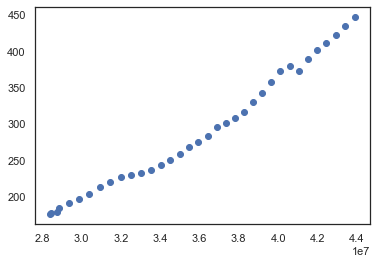

In [39]:
#here we plot the rather obvious relationship between population and GDP
plt.scatter(final_years['Population'], final_years['GDP'])

Text(0, 0.5, 'Fertility_rate')

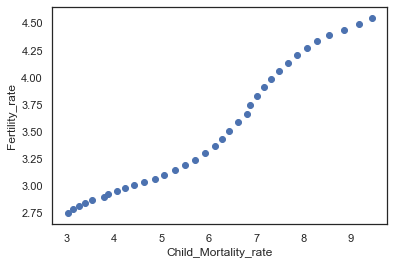

In [40]:
#here we plot the interesting relationsip between the Fertility rate and the Child Mortality rate
plt.scatter(x=final_years['Child_Mortality_rate'], y=final_years['Fertility_rate'])
plt.xlabel('Child_Mortality_rate')
plt.ylabel('Fertility_rate')

In [41]:
#here we save the table to work with it in tableau
final_years.to_csv('Final_years.csv')

## And Now... Let's bring those tables and correlation matrixes to Tableau so we can visualize it better